1. Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

2. Read data from CSV and evaluate model

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Root Mean Square Error for ADA: 0.06034527922810274


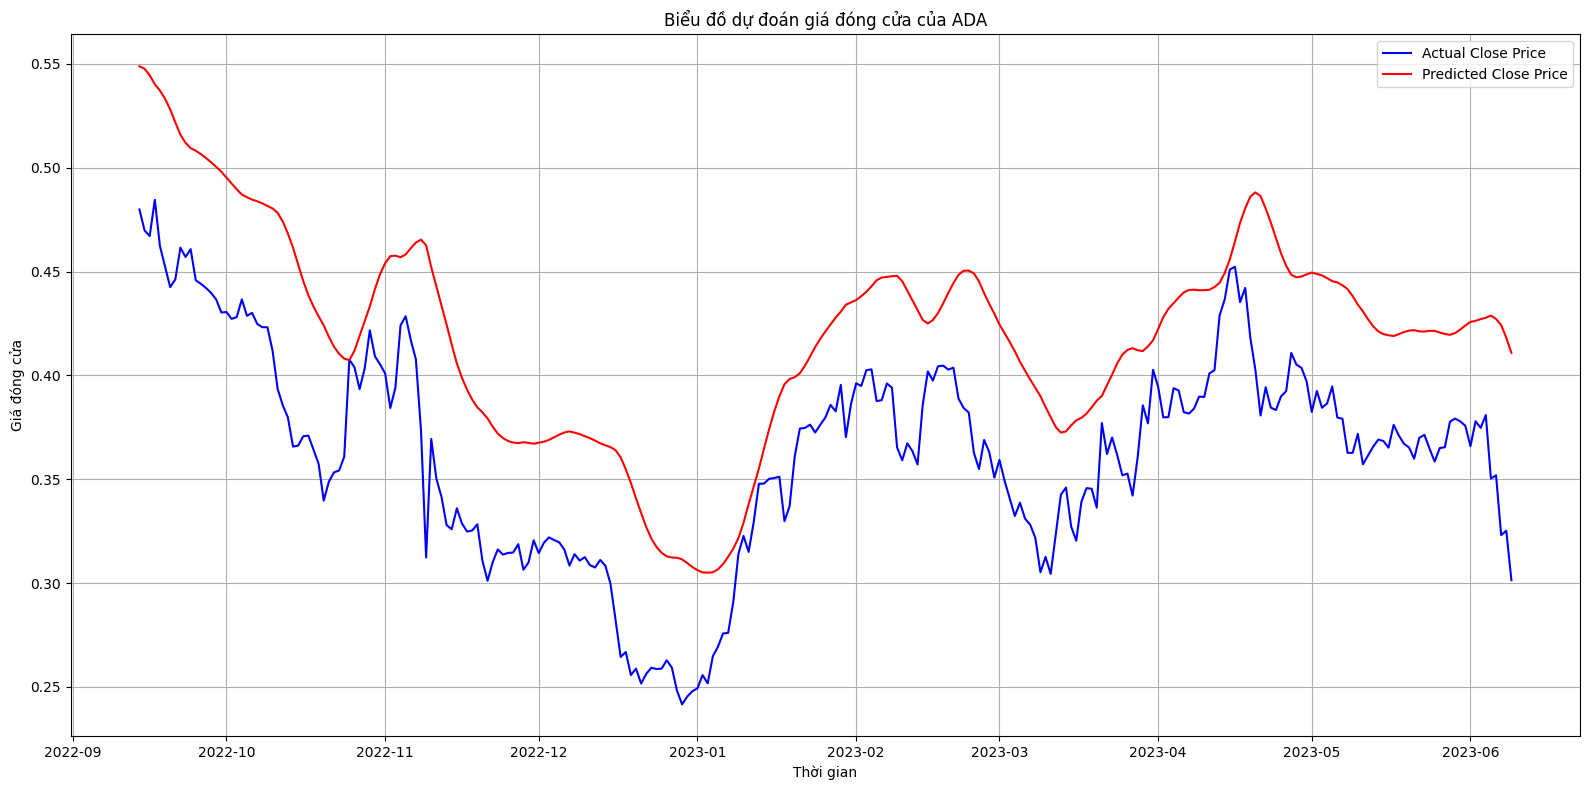

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Root Mean Square Error for BTC: 1168.361582310568


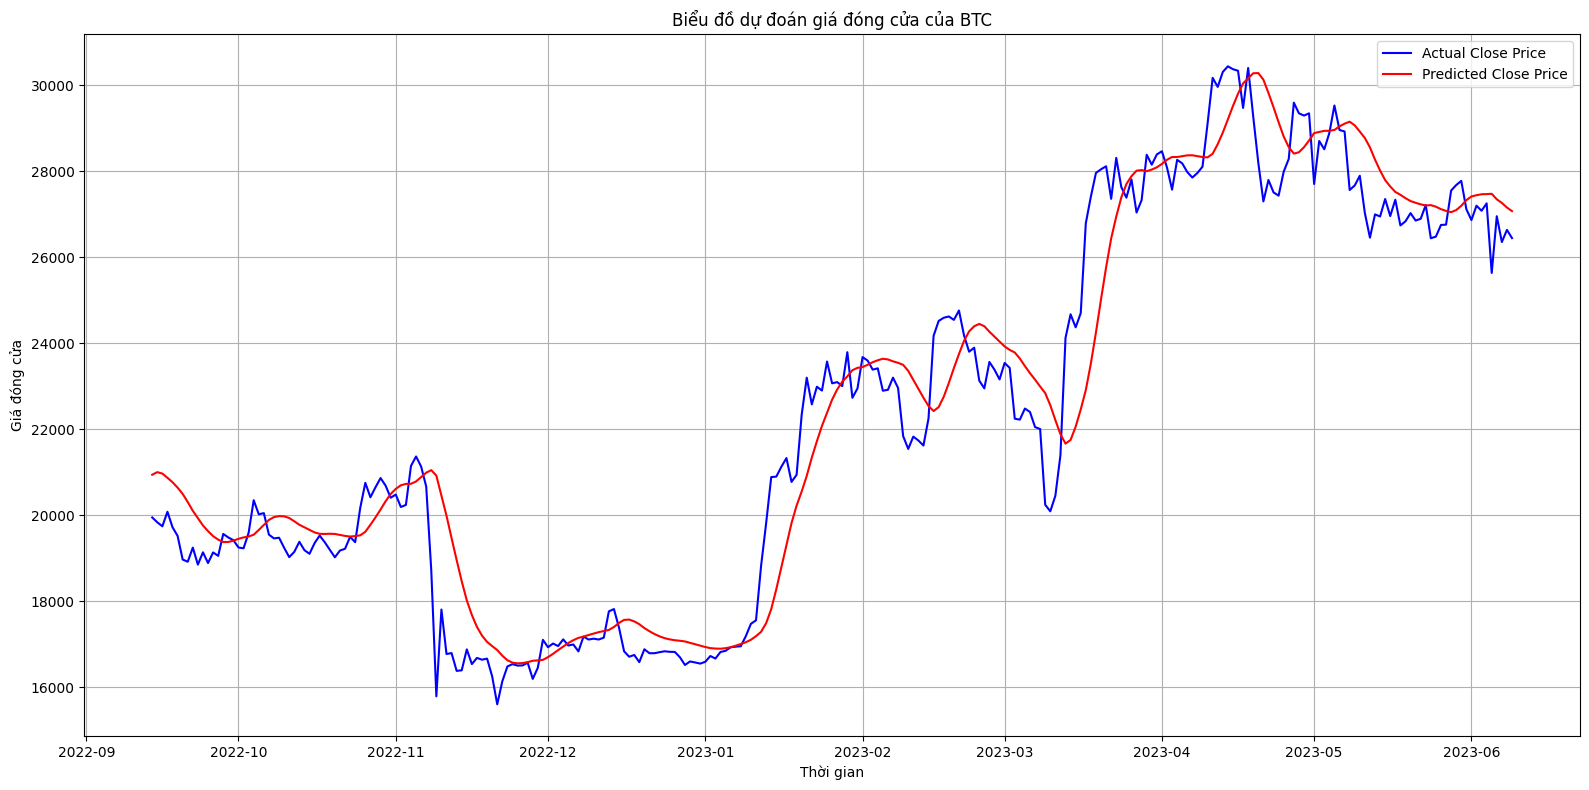

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Root Mean Square Error for ETH: 100.86296328242975


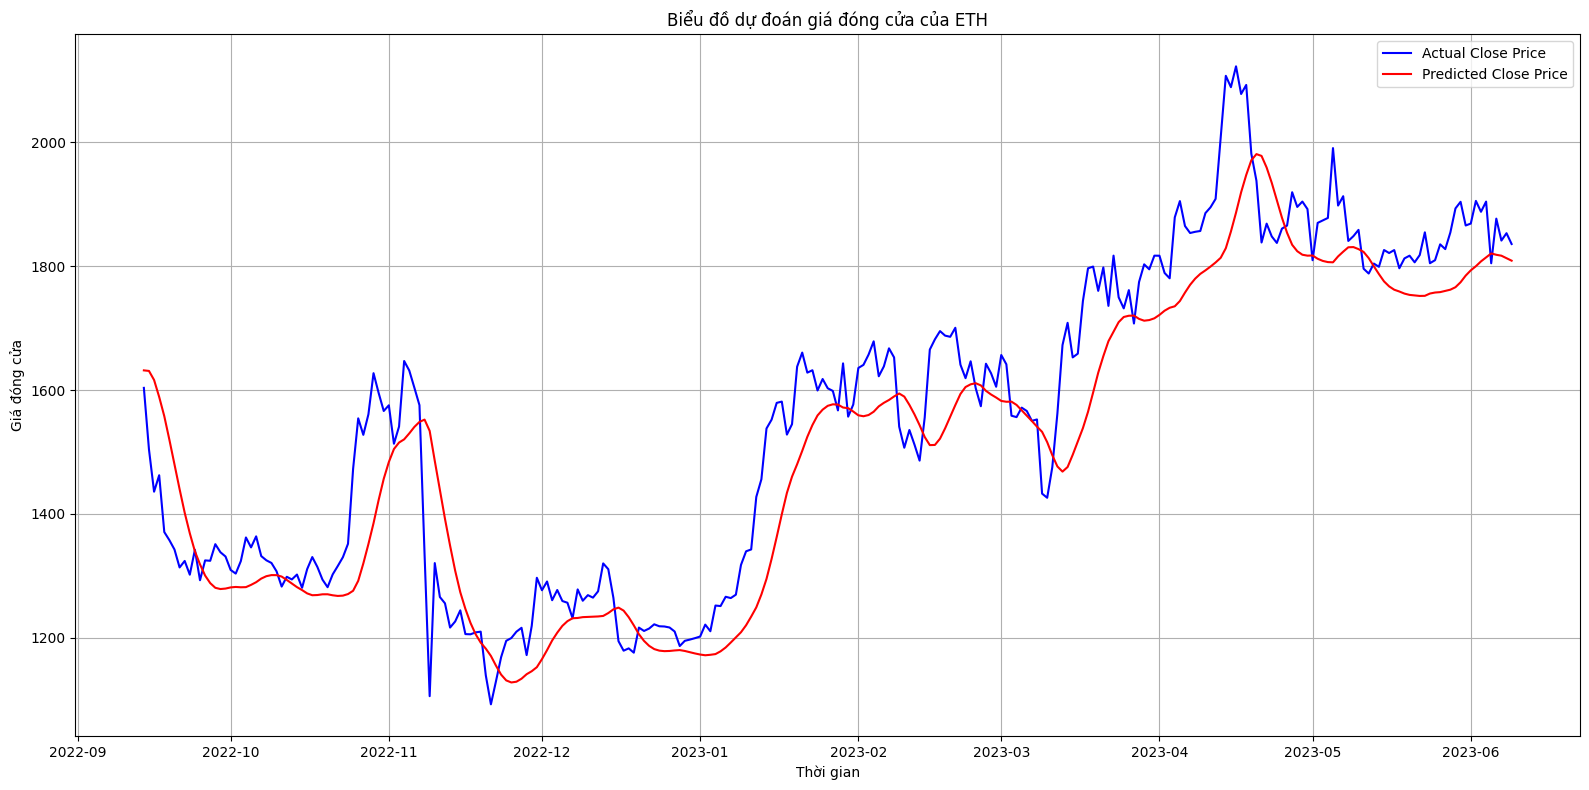

In [2]:
cryptos = ['ADA', 'BTC', 'ETH']

for crypto in cryptos:
    # Đọc dữ liệu đã xử lý
    data = pd.read_csv(f'../data/processed/{crypto}_processed.csv')

    # Lấy cột Date và Close
    data = data[['Date', 'Close']]

    # Chuyển cột Date sang kiểu datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Đặt cột Date làm index
    data.set_index('Date', inplace=True)

    # Scale dữ liệu
    scaler = MinMaxScaler(feature_range=(0, 1))
    final_data = data.values
    scaled_data = scaler.fit_transform(final_data)

    # Chia dữ liệu thành 2 tập train và validation
    train_size = int(len(scaled_data) * 0.7)
    train_data = scaled_data[:train_size]
    valid_data = scaled_data[train_size:]

    # Tạo dữ liệu cho model
    x_valid, y_valid = [], []
    for i in range(60, len(valid_data)):
        x_valid.append(valid_data[i-60:i, 0])
        y_valid.append(final_data[train_size + i, 0])  # Lấy giá trị thực tế tương ứng

    # Chuyển dữ liệu về dạng numpy array
    x_valid = np.array(x_valid)
    y_valid = np.array(y_valid)
    x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))

    # Load model
    model = load_model(f'../models/saved_models/{crypto}_model.h5')

    # Dự đoán giá đóng cửa
    predictions = model.predict(x_valid)
    predictions = scaler.inverse_transform(predictions)

    # Tính sai số
    rms = np.sqrt(np.mean(np.power((predictions - y_valid.reshape(-1, 1)), 2)))
    print(f'Root Mean Square Error for {crypto}: {rms}')

    # Vẽ biểu đồ
    plt.figure(figsize=(16,8))
    plt.plot(data.index[train_size+60:], y_valid, color='blue', label='Actual Close Price')
    plt.plot(data.index[train_size+60:], predictions, color='red', label='Predicted Close Price')
    plt.title(f'Biểu đồ dự đoán giá đóng cửa của {crypto}')
    plt.xlabel('Thời gian')
    plt.ylabel('Giá đóng cửa')

    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
